# TP 2. PARTIE 2. LDA - QDA. k-NN


<img src="http://media.giphy.com/media/2lbhL8dSGMh8I/giphy.gif"  width="200">


In [1]:
print("Hello world!")

Hello world!


## Plan :

   [- PDA-QDA](#1)
   
   [- Dataset Vowel](#2)
   
   [- k-NN](#3)   

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

<img src="http://media2.giphy.com/media/mt7XXZqJGhrWg/giphy.gif" width = 300>
<a id="1"></a> 
 
# 1. LDA-QDA


In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [5]:
from sklearn.datasets import load_iris
# loading the iris dataset
iris = load_iris()
X = iris.data[: , [1,3]]
y = iris.target
h=.02

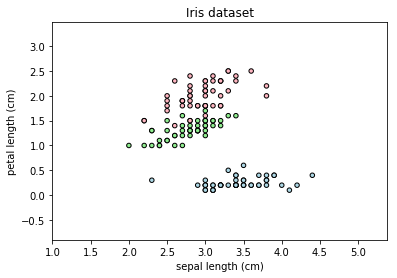

In [6]:
cmap_bold = ListedColormap(['#ADD8E6', '#90EE90','#FFB6C1'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.show()

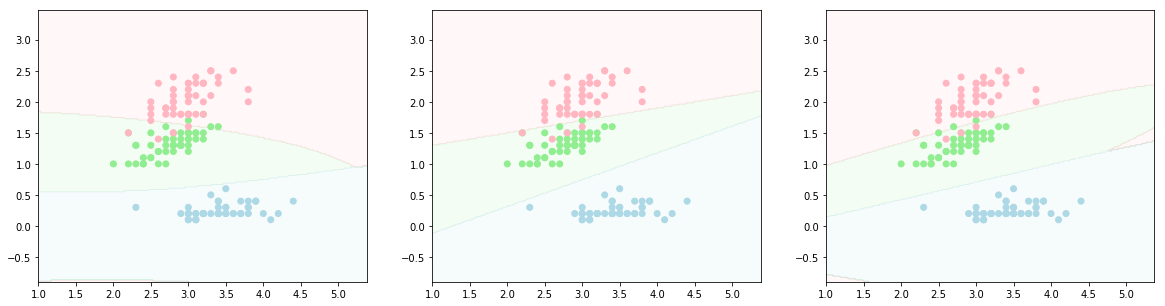

In [7]:
figure = plt.figure(figsize=(20, 5))
h = .02  # step size in the mesh
i=0
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):
    i += 1
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z_p = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    
    #print(Z_p.shape)
    
    # Put the result into a color plot
    Z = np.argmax(Z_p,axis=1) + 1
    Z = Z.reshape(xx.shape)
   
    ax.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.1)

    # Plot also the points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    

In [8]:
len(np.arange(x_min, x_max, h))*len(np.arange(y_min, y_max, h))

48400

In [9]:
np.c_[xx.ravel(), yy.ravel()].shape

(48400L, 2L)

In [10]:
Z

array([[3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int64)

In [11]:
Z = np.argmax(Z_p,axis=1) + 1
print(len(np.c_[xx.ravel(), yy.ravel()]))
print(Z.shape[0])

48400
48400


<img src="https://media.giphy.com/media/4cZspmcX3AvV6/giphy.gif" width = 200>
<a id="2"></a> 
 
# 2. Dataset Vowel


https://web.stanford.edu/~hastie/ElemStatLearn/data.html

In [12]:
train=pd.read_csv('vowel.train.csv', sep=',')
train

,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
5,6,6,-2.852,1.914,-0.755,0.825,-1.588,0.855,0.217,-0.246,0.238,-0.365
6,7,7,-3.482,2.524,-0.433,1.048,-1.995,0.902,0.322,0.450,0.377,-0.366
7,8,8,-3.941,2.305,0.124,1.771,-1.815,0.593,-0.435,0.992,0.575,-0.301
8,9,9,-3.860,2.116,-0.939,0.688,-0.675,1.679,-0.512,0.928,-0.167,-0.434
9,10,10,-3.648,1.812,-1.378,1.578,0.065,1.577,-0.466,0.702,0.060,-0.836


In [13]:
test=pd.read_csv('vowel.test.csv', sep=',')
test

,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
1,2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
2,3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
3,4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
4,5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471
5,6,6,-2.509,1.326,0.354,0.663,-0.724,0.418,-0.496,0.713,0.638,-0.204
6,7,7,-2.764,1.111,0.727,1.540,-0.855,0.261,-1.110,0.227,0.420,0.991
7,8,8,-3.816,3.426,0.224,-0.384,-1.733,0.434,-0.322,1.333,0.653,0.577
8,9,9,-3.839,1.248,0.830,0.982,-1.110,0.617,-0.751,0.084,0.309,1.125
9,10,10,-4.982,1.538,0.960,1.253,-0.640,0.588,-0.484,-0.310,-0.246,1.180


In [14]:
test = test.iloc[:,1:11]
test

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9
0,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300
1,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375
2,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363
3,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009
4,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254
5,6,-2.509,1.326,0.354,0.663,-0.724,0.418,-0.496,0.713,0.638
6,7,-2.764,1.111,0.727,1.540,-0.855,0.261,-1.110,0.227,0.420
7,8,-3.816,3.426,0.224,-0.384,-1.733,0.434,-0.322,1.333,0.653
8,9,-3.839,1.248,0.830,0.982,-1.110,0.617,-0.751,0.084,0.309
9,10,-4.982,1.538,0.960,1.253,-0.640,0.588,-0.484,-0.310,-0.246


Répéter l'analyse faite sur le dataset iris avec les données vowel.

LA SOLUTION EST VUE AU TP3

<img src="https://media1.giphy.com/media/LNXivXzMwd7W0/giphy.gif" width = 300>
<a id="3"></a> 
 
# 3. k-NN

https://openclassrooms.com/courses/initiez-vous-au-machine-learning/tp-entrainez-le-modele-des-k-plus-proches-voisins-k-nn

Utiliser l'algo k-NN pour différents k et comparez ses performances avec les méthodes précédentes.

CF TP 3